# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [66]:
import pandas as pd 
import numpy as np
from plotly.subplots import make_subplots
from plotly.offline import iplot,init_notebook_mode,download_plotlyjs,plot
import plotly.figure_factory as ff
import plotly.graph_objects as go
init_notebook_mode(connected=True)
from sklearn import*

In [43]:
df=pd.read_csv('spam_or_not_spam.csv')
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [44]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

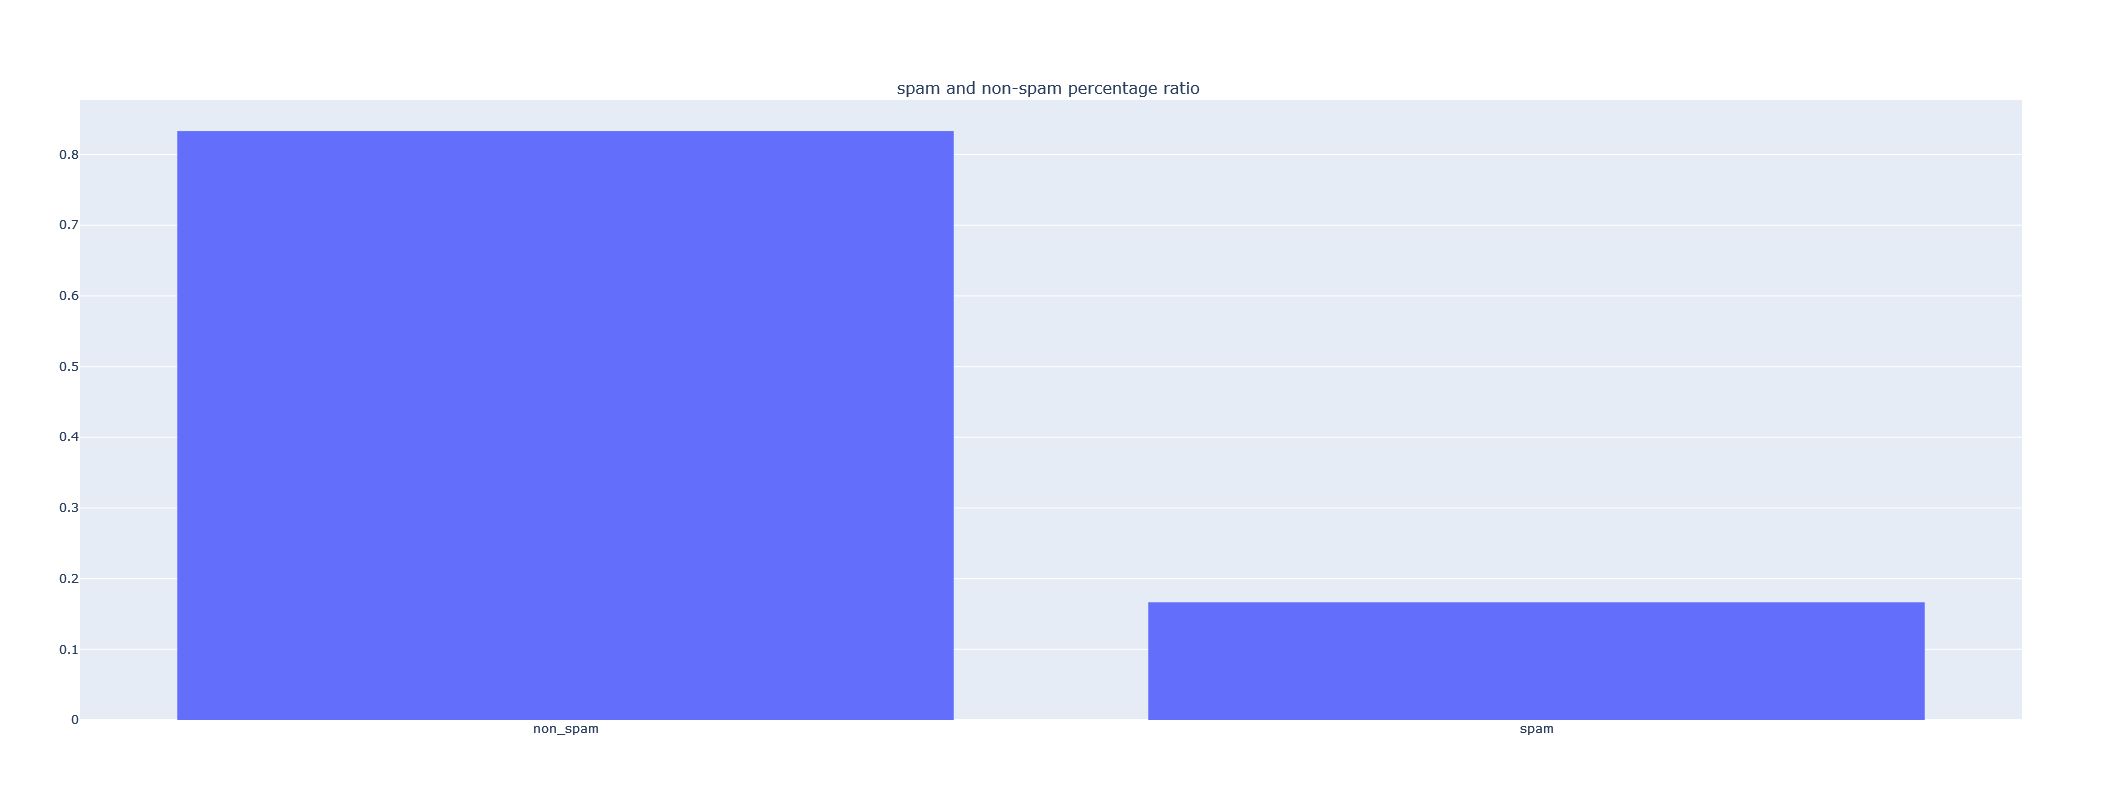

In [45]:
fig=make_subplots(rows=1,cols=1,shared_xaxes=True,shared_yaxes=True,vertical_spacing=0,horizontal_spacing=0,column_titles=['spam and non-spam percentage ratio '])
objects=[go.Bar(y=df['label'].value_counts(normalize=True),x=['non_spam','spam'],marker_line_color='white',marker_line_width=0.1)]
fig.add_traces(objects,rows=[1],cols=[1])
fig.update_layout(height=800,width=1000)
fig.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [47]:
df.dropna(inplace=True)
df


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


Переводим данные в векторный вид:

In [49]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [54]:
X.toarray().shape

(2999, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [65]:
X=X.toarray()
y=df['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [82]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,random_state=42,test_size=0.25) 
                                                                                                   

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [83]:
y_test.mean()

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [95]:
complement=naive_bayes.ComplementNB(alpha=0.01)         # Модель ComplementNB
complement.fit(X_train,y_train)                         # Обучение ComplementNB
y_pred_complement=complement.predict(X_test)            # Предсказание ComplementNB

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [92]:
print(metrics.classification_report(y_test,y_pred_multinomial))  # Метрики MultinomialNB    
print(metrics.classification_report(y_test,y_pred_complement))  # Метрики ComplementNB

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       0.99      0.98      0.99       123

    accuracy                           1.00       750
   macro avg       0.99      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       0.98      0.98      0.98       123

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [101]:
print('accuracy {}'.format(metrics.accuracy_score(y_test,y_pred_complement)))
print('precision {}'.format(metrics.precision_score(y_test,y_pred_complement)))
print('reacall {}'.format(metrics.recall_score(y_test,y_pred_complement)))
print('f1-score {}'.format(metrics.f1_score(y_test,y_pred_complement)))

accuracy 0.9946666666666667
precision 0.983739837398374
reacall 0.983739837398374
f1-score 0.983739837398374


Нарисуйте ROC-кривую:

In [ ]:
#ваш код здесь

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь